<b>Objectif :</b>

En utilisant le dataset `synthetic_housing_dataset.csv`, vous allez préparer un modèle de prediction de prix d'appartement étant données ses caractéristiques

<b>Directives :</b>

Veuillez suivre les étapes de `CRISP-DM` pour dévéloper le modèle.

## Compérehsnion du métier

L'objectif de ce projet est de construire un modèle de prédiction de prix des appartements en utilisant les données fournies dans le fichier `synthetic_housing_dataset.csv`. 
Le modèle permettra de prévoir la valeur d'un appartement en fonction de ses caractéristiques, telles que la superficie, le nombre de chambres, l'emplacement, etc.

### Contexte métier :
- Les prix des appartements varient considérablement en fonction des caractéristiques physiques et de l'emplacement géographique.
- Comprendre ces relations peut aider les promoteurs immobiliers, les agences et les particuliers à mieux évaluer les biens immobiliers.
- Un modèle prédictif permettra d'automatiser et d'améliorer l'exactitude des estimations.

### Objectifs spécifiques :
1. Identifier les caractéristiques les plus influentes sur les prix.
2. Construire un modèle robuste pour prédire les prix.
3. Évaluer les performances du modèle avec des métriques adaptées (par exemple, MAE, RMSE).


### Étapes :
1. Chargement des données depuis le fichier CSV.
2. Exploration des données pour identifier les caractéristiques importantes.
3. Séparation des données en deux ensembles : 
   - **X (features)** : les caractéristiques utilisées pour la prédiction.
   - **y (target)** : la variable cible (prix des appartements).


In [176]:
import pandas as pd

dataset_path = "C:\\Users\\esteb\\OneDrive\\Documents\\PI\\MLOps\\synthetic_housing_dataset.csv"
data = pd.read_csv(dataset_path)

print("Aperçu des données :")
display(data.head())

print("\nRésumé des données :")
print(data.info())

X = data.drop(columns=['price'])
y = data['price']

print(f"Dimensions des données :\nFeatures (X) : {X.shape}\nCible (y) : {y.shape}")

Aperçu des données :


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris,629535.486411
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon,682734.110117
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon,705054.855203
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille,550261.271344
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse,510619.235213



Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   size_m2                  100 non-null    float64
 1   num_bedrooms             95 non-null     float64
 2   num_bathrooms            100 non-null    float64
 3   distance_school          100 non-null    float64
 4   public_transport_access  97 non-null     float64
 5   property_tax             100 non-null    float64
 6   date_built               100 non-null    object 
 7   city                     100 non-null    object 
 8   price                    100 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.2+ KB
None
Dimensions des données :
Features (X) : (100, 8)
Cible (y) : (100,)


## Compréhension des données

Diviser les données en entrée (features X) et sortie (cible y)

In [177]:
import pandas as pd

dataset_path = 'synthetic_housing_dataset.csv'
dataset = pd.read_csv(dataset_path)

X = dataset.drop(columns=['price'])
y = dataset['price']

print("Aperçu des features (X) :")
display(X.head())

print("\nAperçu de la cible (y) :")
display(y.head())

Aperçu des features (X) :


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse



Aperçu de la cible (y) :


0    629535.486411
1    682734.110117
2    705054.855203
3    550261.271344
4    510619.235213
Name: price, dtype: float64

Diviser les données en train et test (X_train, X_test, y_train, y_test)

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensions de l'ensemble d'entraînement : X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Dimensions de l'ensemble de test : X_test = {X_test.shape}, y_test = {y_test.shape}")

Dimensions de l'ensemble d'entraînement : X_train = (80, 8), y_train = (80,)
Dimensions de l'ensemble de test : X_test = (20, 8), y_test = (20,)


Vérifier les types des colonnes

In [179]:
print("Types des colonnes dans le dataset :")
print(X.dtypes)

Types des colonnes dans le dataset :
size_m2                    float64
num_bedrooms               float64
num_bathrooms              float64
distance_school            float64
public_transport_access    float64
property_tax               float64
date_built                  object
city                        object
dtype: object


Analyse descriptive

Statistiques descriptives des données :


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,price
count,100.000000,95.000000,100.000000,100.000000,97.000000,100.000000,100.000000
mean,239.304605,2.911012,2.081660,4.712559,4.637516,955.294858,552958.490913
std,987.255056,0.955481,0.722163,2.897322,3.066544,803.084281,145741.541880
min,-50.000000,0.518600,0.075309,0.145447,-0.199299,-963.865284,126877.612975
25%,117.346484,2.345428,1.613437,2.028225,2.278455,469.459761,471887.796953
50%,139.866728,2.791213,2.111695,4.599573,4.546566,922.619185,556742.850477
75%,168.257576,3.438545,2.543021,6.938161,6.943386,1482.927155,648621.375838
max,10000.000000,5.522306,3.652681,9.997177,11.227652,3024.877889,910713.536337


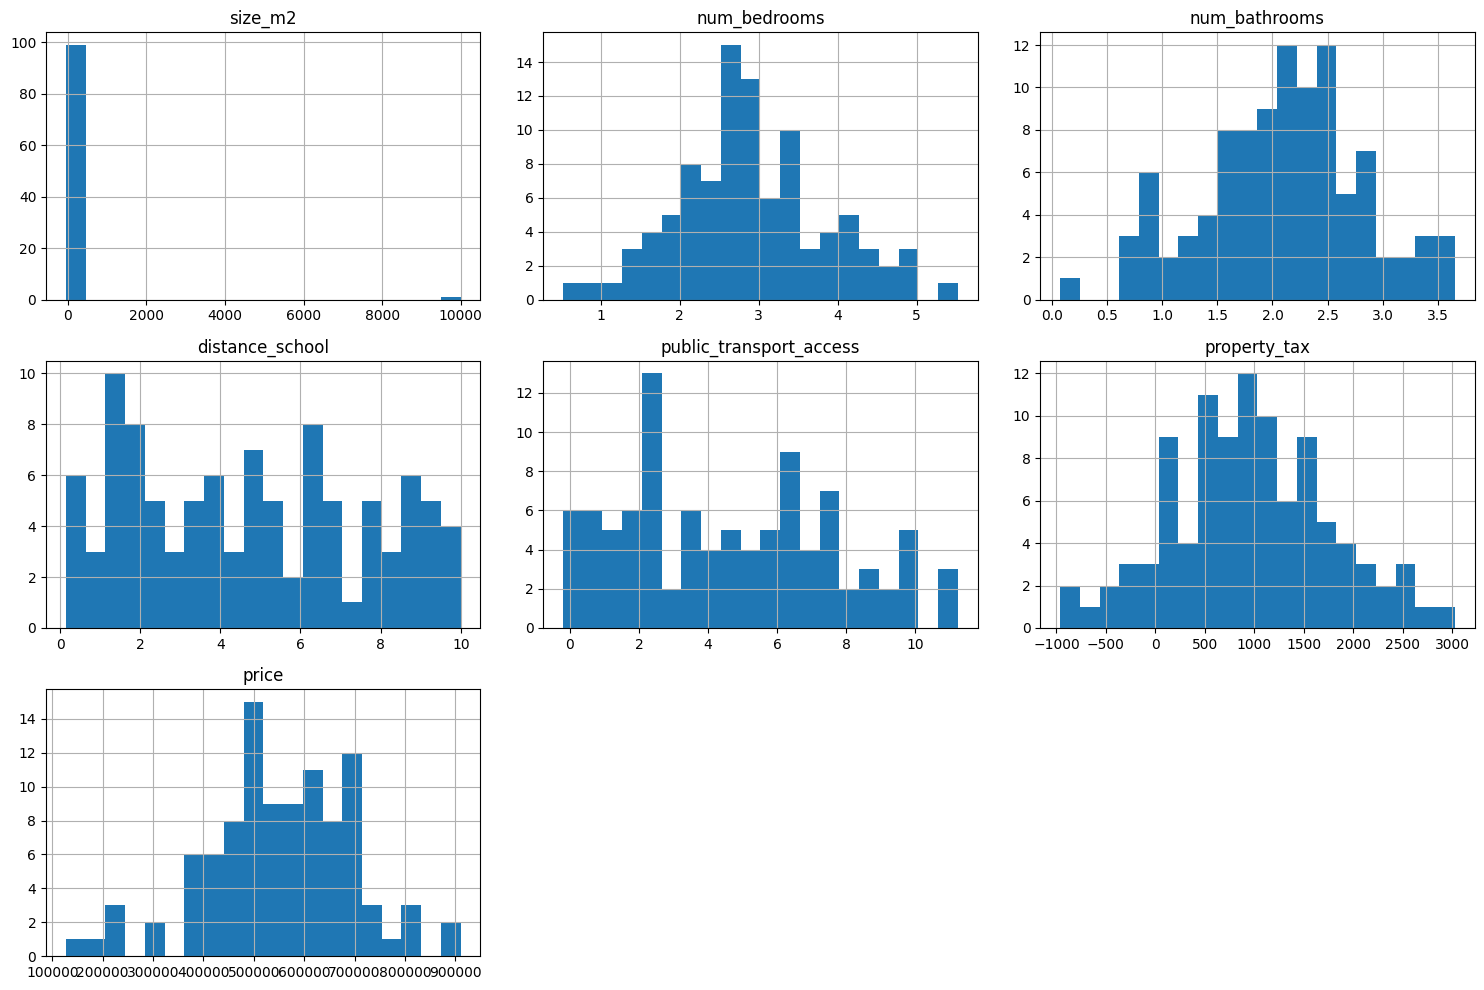

In [180]:
print("Statistiques descriptives des données :")
display(dataset.describe())

import seaborn as sns
import matplotlib.pyplot as plt

dataset.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Analyse des valeurs manquantes

Valeurs manquantes par colonne :


,Valeurs manquantes,Pourcentage (%)
size_m2,0,0.0
num_bedrooms,5,5.0
num_bathrooms,0,0.0
distance_school,0,0.0
public_transport_access,3,3.0
property_tax,0,0.0
date_built,0,0.0
city,0,0.0
price,0,0.0


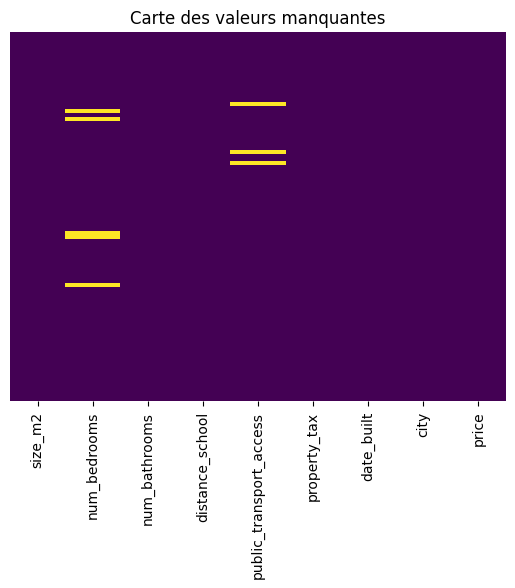

In [181]:
missing_values = dataset.isnull().sum()
missing_percentage = (missing_values / len(dataset)) * 100

print("Valeurs manquantes par colonne :")
display(pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage (%)': missing_percentage}))

sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Carte des valeurs manquantes')
plt.show()

Analyse des valeurs aberantes (outliers)

In [182]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

outliers_summary = {}

for col in numeric_columns:
    outliers = detect_outliers_iqr(dataset, col)
    outliers_summary[col] = len(outliers)
    print(f"Colonne : {col}, Nombre de valeurs aberrantes : {len(outliers)}")

print("\nRésumé des valeurs aberrantes :")
display(pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Nombre de valeurs aberrantes']))

Colonne : size_m2, Nombre de valeurs aberrantes : 4
Colonne : num_bedrooms, Nombre de valeurs aberrantes : 2
Colonne : num_bathrooms, Nombre de valeurs aberrantes : 1
Colonne : distance_school, Nombre de valeurs aberrantes : 0
Colonne : public_transport_access, Nombre de valeurs aberrantes : 0
Colonne : property_tax, Nombre de valeurs aberrantes : 1
Colonne : price, Nombre de valeurs aberrantes : 2

Résumé des valeurs aberrantes :


,Nombre de valeurs aberrantes
size_m2,4
num_bedrooms,2
num_bathrooms,1
distance_school,0
public_transport_access,0
property_tax,1
price,2


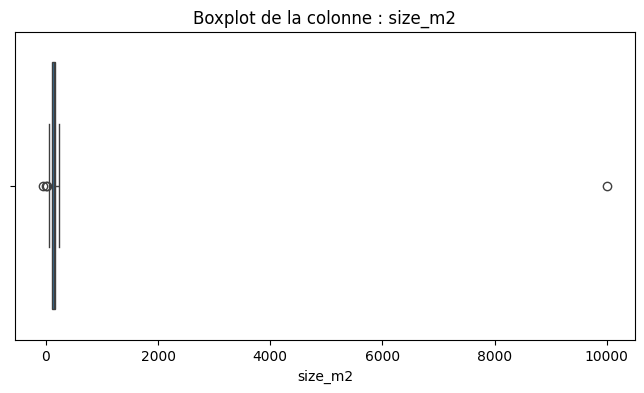

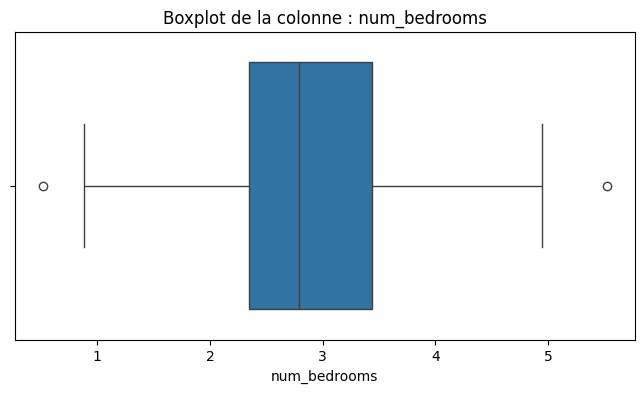

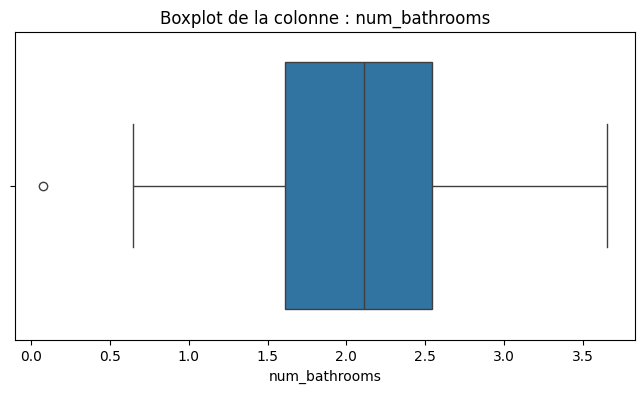

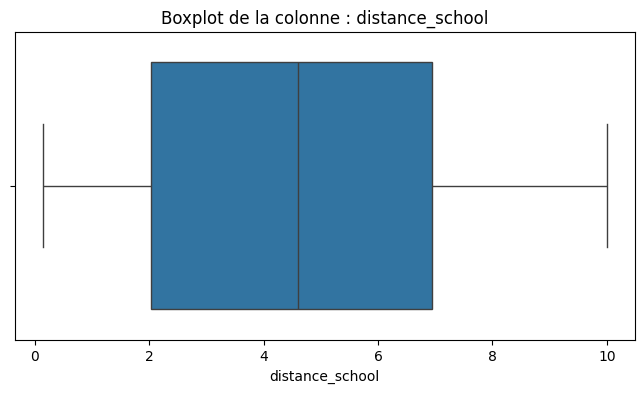

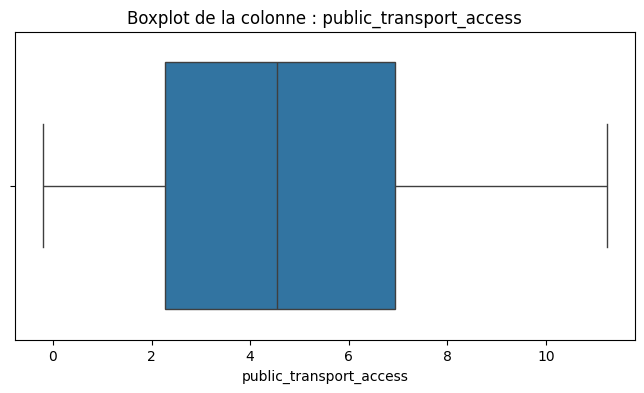

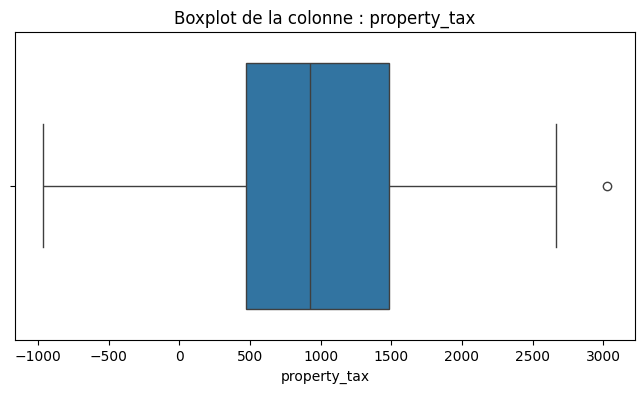

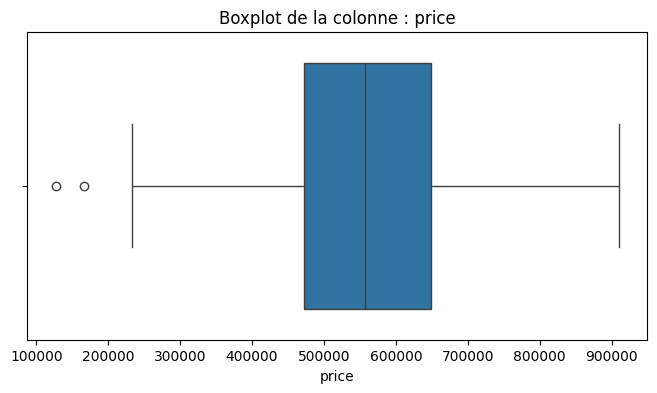

In [183]:

for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot de la colonne : {col}")
    plt.show()

## Préparation des données

Nettoyage des données

In [184]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    dataset[col].fillna(dataset[col].median(), inplace=True)

categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

print("Valeurs manquantes après traitement :")
print(dataset.isnull().sum())

Valeurs manquantes après traitement :
size_m2                    0
num_bedrooms               0
num_bathrooms              0
distance_school            0
public_transport_access    0
property_tax               0
date_built                 0
city                       0
price                      0
dtype: int64


C:\Users\esteb\AppData\Local\Temp\ipykernel_4408\3801689720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)
C:\Users\esteb\AppData\Local\Temp\ipykernel_4408\3801689720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [185]:
def impute_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    impute_outliers_iqr(dataset, col)

print("Valeurs aberrantes imputées avec succès.")

Valeurs aberrantes imputées avec succès.


Transformation des données

In [186]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = dataset.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(dataset[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

dataset = pd.concat([dataset.drop(columns=categorical_columns), encoded_df], axis=1)
print("Colonnes après encodage :")
print(dataset.head())

Colonnes après encodage :
      size_m2  num_bedrooms  num_bathrooms  distance_school  \
0  244.624214      2.789029       2.569210         4.148195   
1   40.979846      2.651413       2.156254         2.734071   
2   40.979846      3.476331       2.822102         0.563755   
3  226.151493      4.121891       3.441496         8.647224   
4  138.292331      2.685204       1.700071         8.129010   

   public_transport_access  property_tax          price  \
0                 5.793163   1244.341795  629535.486411   
1                 2.485035   -558.753511  682734.110117   
2                 1.140312    230.558272  705054.855203   
3                 8.958474   2114.877349  550261.271344   
4                11.207891    886.508895  510619.235213   

   date_built_1961-01-01  date_built_1962-01-01  date_built_1963-01-01  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2  

In [187]:
if 'date_built' in dataset.columns:
    dataset['date_built'] = pd.to_datetime(dataset['date_built'], errors='coerce')
    
    dataset['month_built'] = dataset['date_built'].dt.month
    
    dataset.drop(columns=['date_built'], inplace=True)
    
    print("La colonne 'date_built' a été transformée en 'month_built'.")
    print(dataset.head())
else:
    print("La colonne 'date_built' n'existe pas dans le dataset.")


La colonne 'date_built' n'existe pas dans le dataset.


In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

print("Exemple des données standardisées :")
print(dataset.head())

Exemple des données standardisées :
    size_m2  num_bedrooms  num_bathrooms  distance_school  \
0  2.121915     -0.125663       0.680200        -0.195770   
1 -2.142356     -0.278292       0.102365        -0.686308   
2 -2.142356      0.636623       1.034062        -1.439159   
3  1.735100      1.352613       1.900758         1.364877   
4 -0.104653     -0.240815      -0.535956         1.185116   

   public_transport_access  property_tax     price  date_built_1961-01-01  \
0                 0.385530      0.362261  0.531447              -0.142857   
1                -0.715481     -1.895848  0.906510              -0.142857   
2                -1.163031     -0.907352  1.063877              -0.142857   
3                 1.439009      1.452477 -0.027455              -0.142857   
4                 2.187660     -0.085872 -0.306941              -0.142857   

   date_built_1962-01-01  date_built_1963-01-01  ...  date_built_2014-01-01  \
0              -0.204124              -0.100504  ...   

Optimisation des données

In [189]:
correlation_matrix = dataset.corr()

correlations_with_target = correlation_matrix['price'].abs()

selected_features = correlations_with_target[correlations_with_target > 0.1].index.tolist()

selected_features.remove('price')

dataset_selected = dataset[selected_features + ['price']]

print("Features sélectionnées :")
print(selected_features)
print("\nAperçu du nouveau dataset :")
print(dataset_selected.head())

Features sélectionnées :
['size_m2', 'num_bedrooms', 'num_bathrooms', 'date_built_1962-01-01', 'date_built_1963-01-01', 'date_built_1966-01-01', 'date_built_1967-01-01', 'date_built_1968-01-01', 'date_built_1971-01-01', 'date_built_1979-01-01', 'date_built_1993-01-01', 'date_built_1996-01-01', 'date_built_1998-01-01', 'date_built_2001-01-01', 'date_built_2002-01-01', 'date_built_2003-01-01', 'date_built_2006-01-01', 'date_built_2010-01-01', 'date_built_2013-01-01', 'date_built_2014-01-01', 'date_built_2016-01-01', 'date_built_2019-01-01', 'date_built_2020-01-01', 'city_Paris', 'city_Toulouse']

Aperçu du nouveau dataset :
    size_m2  num_bedrooms  num_bathrooms  date_built_1962-01-01  \
0  2.121915     -0.125663       0.680200              -0.204124   
1 -2.142356     -0.278292       0.102365              -0.204124   
2 -2.142356      0.636623       1.034062              -0.204124   
3  1.735100      1.352613       1.900758               4.898979   
4 -0.104653     -0.240815      -0.5

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

features = dataset.drop(columns=['price'])
reduced_features = pca.fit_transform(features)

reduced_dataset = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_dataset['price'] = dataset['price']

explained_variance = pca.explained_variance_ratio_
print("Inertie expliquée par PC1 et PC2 :")
print(f"PC1 : {explained_variance[0]:.2%}, PC2 : {explained_variance[1]:.2%}")

print("\nAperçu du dataset réduit :")
print(reduced_dataset.head())

Inertie expliquée par PC1 et PC2 :
PC1 : 5.73%, PC2 : 5.45%

Aperçu du dataset réduit :
        PC1       PC2     price
0  1.844036 -0.125816  0.531447
1 -2.445640 -1.071083  0.906510
2 -1.748026 -2.351803  1.063877
3  3.642090  0.925595 -0.027455
4 -0.172449  2.278936 -0.306941


## Modeling

In [191]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['price'])
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensions de l'ensemble d'entraînement : X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Dimensions de l'ensemble de test : X_test = {X_test.shape}, y_test = {y_test.shape}")

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R²": r2})

import pandas as pd
results_df = pd.DataFrame(results)
print("Performance des modèles :")
display(results_df.sort_values(by="RMSE", ascending=True))

Dimensions de l'ensemble d'entraînement : X_train = (80, 58), y_train = (80,)
Dimensions de l'ensemble de test : X_test = (20, 58), y_test = (20,)
Performance des modèles :


,Model,RMSE,MAE,R²
2,Random Forest,8.329230e-01,6.753770e-01,2.288114e-01
1,Decision Tree,1.047568e+00,8.593224e-01,-2.198749e-01
0,Linear Regression,4.056310e+12,1.393504e+12,-1.828998e+25


## Evaluation

Prédire les sorties des données de train et de test avec le modèle entrainé

In [192]:
if 'metrics' not in locals():
    metrics = pd.DataFrame(results)
    print("Variable 'metrics' créée avec succès.")

if 'metrics_sorted' not in locals():
    metrics_sorted = metrics.sort_values(by='RMSE', ascending=True)
    print("Résumé des performances des modèles :")
    display(metrics_sorted)

best_model_name = metrics_sorted.iloc[0]['Model']
best_model = models[best_model_name]

y_train_pred = best_model.predict(X_train)

y_test_pred = best_model.predict(X_test)

print("Exemples de prédictions sur l'ensemble d'entraînement :")
train_predictions = pd.DataFrame({'Réel': y_train, 'Prédit': y_train_pred}).head(10)
display(train_predictions)

print("\nExemples de prédictions sur l'ensemble de test :")
test_predictions = pd.DataFrame({'Réel': y_test, 'Prédit': y_test_pred}).head(10)
display(test_predictions)

Exemples de prédictions sur l'ensemble d'entraînement :


,Réel,Prédit
55,0.961319,0.740240
88,-0.162786,-0.284257
26,0.466115,0.067249
42,-0.315321,-0.213634
69,-0.357320,-0.250751
15,-0.549462,-0.347920
40,1.028372,0.893220
96,0.965954,0.619006
9,0.955432,0.800597
72,-0.272561,-0.116720



Exemples de prédictions sur l'ensemble de test :


,Réel,Prédit
83,0.366139,-0.256809
53,0.446855,0.842071
70,0.572160,0.548617
45,0.900358,-0.415720
44,-0.861120,-1.284106
39,0.019051,0.000723
22,1.103708,0.288906
80,-1.127448,0.132248
10,0.848350,-0.100483
0,0.531447,0.672844


Evaluer la performance du modèle

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Évaluation des performances du modèle sélectionné :")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Coefficient de Détermination (R²) : {r2:.2f}")

Évaluation des performances du modèle sélectionné :
Mean Squared Error (MSE) : 0.69
Mean Absolute Error (MAE) : 0.68
Coefficient de Détermination (R²) : 0.23


In [194]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)

print(f"Coefficient de Détermination (R²) : {r2:.2f}")

Coefficient de Détermination (R²) : 0.23


## Déploiement

Utiliser le modèle évalué pour prédire le prix d'un apprtement quelconque

In [195]:
from sklearn.preprocessing import StandardScaler

# Séparer explicitement les features et la cible avant la normalisation
X = dataset.drop(columns=['price'])  # Exclure la colonne cible
y = dataset['price']

# Normaliser uniquement les colonnes numériques des features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Réintégrer la cible pour reformer le dataset si nécessaire
dataset_scaled = X_scaled.copy()
dataset_scaled['price'] = y

print("Exemple des données standardisées :")
print(dataset_scaled.head())


Exemple des données standardisées :
    size_m2  num_bedrooms  num_bathrooms  distance_school  \
0  2.121915     -0.125663       0.680200        -0.195770   
1 -2.142356     -0.278292       0.102365        -0.686308   
2 -2.142356      0.636623       1.034062        -1.439159   
3  1.735100      1.352613       1.900758         1.364877   
4 -0.104653     -0.240815      -0.535956         1.185116   

   public_transport_access  property_tax  date_built_1961-01-01  \
0                 0.385530      0.362261              -0.142857   
1                -0.715481     -1.895848              -0.142857   
2                -1.163031     -0.907352              -0.142857   
3                 1.439009      1.452477              -0.142857   
4                 2.187660     -0.085872              -0.142857   

   date_built_1962-01-01  date_built_1963-01-01  date_built_1964-01-01  ...  \
0              -0.204124              -0.100504              -0.142857  ...   
1              -0.204124            